# Sequence Analysis Overview

> How to ask questions in the sequence domain

The sequence domain concerns the order in which events happen, as opposed to when they happen in time (time domain), or how frequenctly they occur (frequency domain).
Applying techniques from sequence analysis means framing your questions in the sequence domain.

In [ ]:
#export
import numpy as np, matplotlib.pyplot as plt
from pysan.core.elements import *

def plot_sequence(sequence, highlighted_ngrams=[]):
    "Creates a standard sequence plot where each element corresponds to a position on the y-axis. The optional highlighted_ngrams parameter can be one or more n-grams to be outlined in a red box."
    np_sequence = np.array(sequence)
    alphabet_len = len(get_alphabet(sequence))

    plt.figure(figsize=[len(sequence)*0.3,alphabet_len * 0.3])

    unique_values = list(set(sequence))
    for i, value in enumerate(unique_values):

        points = np.where(np_sequence == value, i, np.nan)

        plt.scatter(x=range(len(np_sequence)), y=points, marker='s', label=value, s=35)

    plt.yticks(range(len(unique_values)), unique_values)
    plt.ylim(-1, len(unique_values))

    # highlight any of the n-grams given

    if highlighted_ngrams != []:

        def highlight_ngram(ngram):
            n = len(ngram)
            match_positions = []
            for x in range(len(sequence) -  n + 1):
                this_ngram = sequence[x:x + n]
                if str(this_ngram) == str(ngram):
                    match_positions.append(x)

            for position in match_positions:
                bot = min(ngram) - 1.5
                top = max(ngram) - 0.5
                left = position - 0.5
                right = left + n

                line_width = 1
                plt.plot([left,right], [bot,bot], color='red', linewidth=line_width)
                plt.plot([left,right], [top,top], color='red', linewidth=line_width)
                plt.plot([left,left], [bot,top], color='red', linewidth=line_width)
                plt.plot([right,right], [bot,top], color='red', linewidth=line_width)

        # check if only one n-gram has been supplied
        if type(highlighted_ngrams[0]) is int:

            highlight_ngram(highlighted_ngrams)

        else: # multiple n-gram's found

            for ngram in highlighted_ngrams:
                highlight_ngram(ngram)

    return plt

<module 'matplotlib.pyplot' from '/home/ojs/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

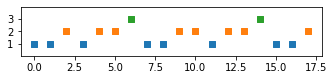

In [ ]:
sequence = [1,1,2,1,2,2,3,1,1,2,2,1,2,2,3,1,1,2]
plot_sequence(sequence)